In [106]:
import sys
sys.path.append('../../')

In [107]:
from scripts.utils import data_path, set_mpl, read_london, add_datetime_features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


%matplotlib widget

set_mpl()

matplotlib settings set


In [108]:
data_std, _, weather = read_london()
data_std['avg'] = data_std.mean(axis=1)


    Loading London data from /Users/sdbykov/not_work/swarm_energAIser/0_data/.
    Weather from `meteostat` package.

    STD and ToU tariffs are separated.
    Data resampled (mean) to 1H resolution from original 30min resolution.

    reutrns:
    df_std: pd.DataFrame with STD tariff data
    df_tou: pd.DataFrame with ToU tariff data
    df_weather: pd.DataFrame with weather data
    
    


In [115]:
import pandas as pd
df = pd.read_json('twitter_data.json', lines=True)
df = df[['date', 'id']]
#10k request, start 21:00, end ~21:17

#no limit request, start 21:43, end 21:59 
#snscrape --progress --jsonl twitter-search "geocode:51.5072,-0.1276,5km lang:en until:2013-05-07 since:2013-05-01  -filter:replies" > twitter_data.json; head -n 1 twitter_data.json


df = df.set_index('date')
df = df.resample('H').count()
df.columns = ['twt_count']
print('total tweets:', df.twt_count.sum())

total tweets: 28215


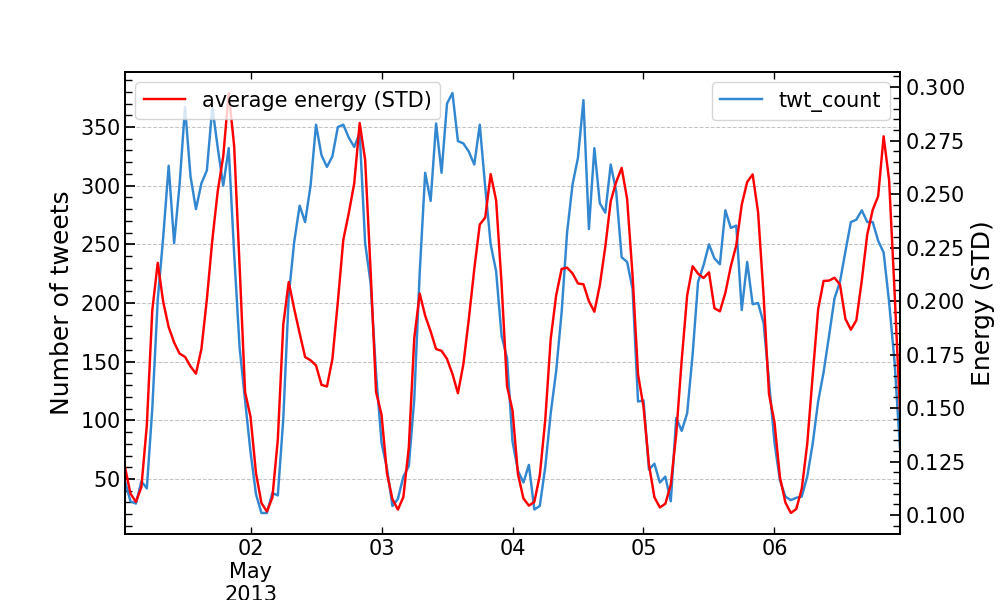

In [116]:
fig,  ax =  plt.subplots( figsize = (10,6))

df.plot(ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Number of tweets')


ax2 = ax.twinx()
data_std.query("index>'2013-05-01' & index<'2013-05-07'")['avg'].plot(ax=ax2, color='red', label = 'average energy (STD)')
ax2.set_ylabel('Energy (STD)')
ax2.grid()
ax2.legend(loc = 'upper left')